In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000922487"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000922487
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,ROYAL BANCSHARES OF PENNSYLVANIA INC
Ticker,RBPAA


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,28.0,4.560357e+00,4.235485e+00,1.38,1.6,1.875,7.095000e+00,12.18
interest income,46.0,1.202015e+07,5.134818e+06,6743000.00,7770250.0,9227000.000,1.655450e+07,23475000.00
net income,46.0,-1.043370e+06,6.322836e+06,-27265000.00,-2920500.0,1012500.000,2.258250e+06,6438000.00
net interest income,46.0,7.116326e+06,1.759500e+06,4772000.00,5717750.0,6733500.000,7.905500e+06,11196000.00
provision for loan losses,36.0,2.273667e+06,3.017501e+06,0.00,200750.0,1074500.000,3.112250e+06,13753000.00


# Plots

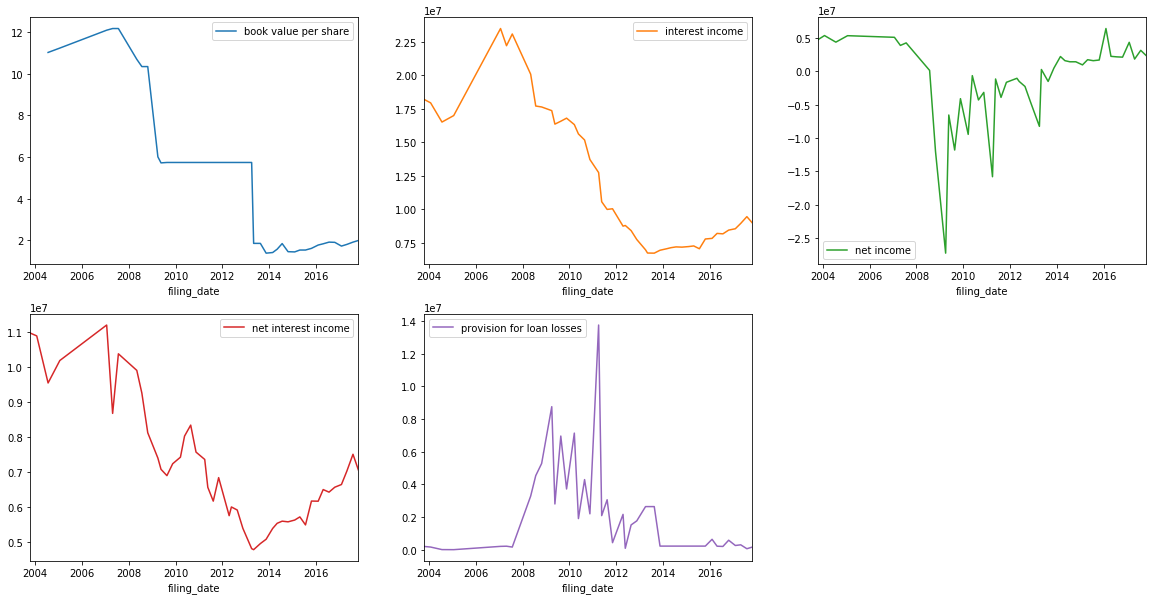

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000922487 book value per share        2003Q3 to 2004Q1: 3 periods  missing   
           book value per share                             2004Q3  missing   
           book value per share        2005Q1 to 2006Q3: 7 periods  missing   
           book value per share        2007Q3 to 2007Q4: 2 periods  missing   
           book value per share                             2008Q3  missing   
           book value per share       2009Q3 to 2012Q4: 14 periods  missing   
           book value per share                             2013Q2  missing   
           interest income                                  2004Q1  missing   
           interest income                                  2004Q3  missing   
           interest income             2005Q1 to 2006Q3: 7 periods  missing   
           interest income             2007Q3 to 2007Q4: 2 periods  missing   
           net income                                       2004Q1  missing   
           net income                                       2004Q3  missing   
           net income                  2005Q1 to 2006Q3: 7 periods  missing   
           net income                  2007Q3 to 2007Q4: 2 periods  missing   
           net interest income                              2004Q1  missing   
           net interest income                              2004Q3  missing   
           net interest income         2005Q1 to 2006Q3: 7 periods  missing   
           net interest income         2007Q3 to 2007Q4: 2 periods  missing   
           provision for loan losses                        2004Q1  missing   
           provision for loan losses                        2004Q3  missing   
           provision for loan losses   2005Q1 to 2006Q3: 7 periods  missing   
           provision for loan losses   2007Q3 to 2007Q4: 2 periods  missing   
           provision for loan losses   2013Q1 to 2013Q2: 2 periods  missing   
           provision for loan losses   2013Q4 to 2015Q3: 8 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000922487 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()